## Metrics
`Throshold` -->  Have some metrics based on default values (Rsquare(0-1:choose the near to 1 value),Adjusted Rsquare)


`Compare models` --> Compare models and choose which one is lesser value(AIC,BIC,RMSE)
- approach to overcome error term will use ols(ordinary least squares)

In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [2]:
file = pd.read_csv(r'C:\Users\naveen\Desktop\EDA_HR_DATA\New folder\SATScores.csv')

In [3]:
file

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,102,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157
5,53,49,36,38,89
6,69,73,71,67,131
7,47,48,55,55,101
8,87,89,66,66,155
9,79,76,83,78,158


In [4]:
file.head()

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,102,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157


In [5]:
file['SAT'].max()

223

## to read columns

In [6]:
file.columns

Index(['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT'], dtype='object')

In [7]:
file.columns.str.len()

Int64Index([18, 9, 12, 8, 3], dtype='int64')

In [8]:
file.columns

Index(['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT'], dtype='object')

In [9]:
file_column = file.columns.str.strip()# removing spaces in column names

## Correlation function for correlation matrix

In [10]:
file.corr()

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,1.000000,0.963232,0.641417,0.640775,0.838191
Aptitude,0.963232,1.000000,0.604610,0.607482,0.797194
Mathematics,0.641417,0.604610,1.000000,0.989769,0.941215
Science,0.640775,0.607482,0.989769,1.000000,0.949496
SAT,0.838191,0.797194,0.941215,0.949496,1.000000


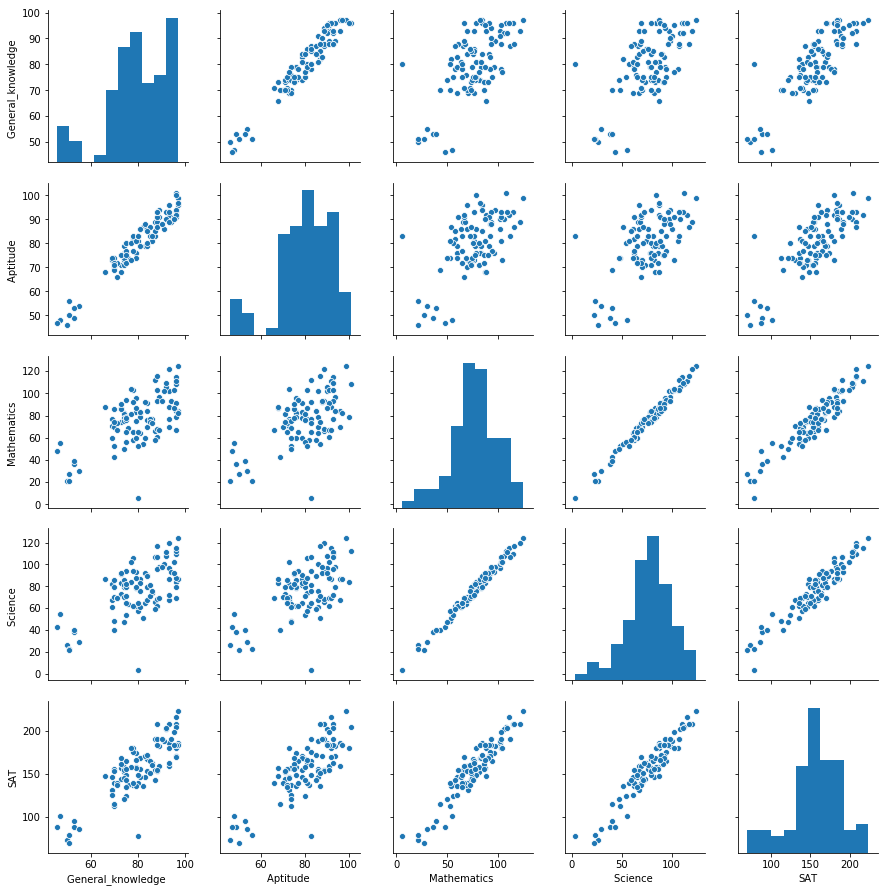

In [11]:
sns.pairplot(file)

In [12]:
np.corrcoef(file)# coefficent correlation

array([[1.        , 0.9966646 , 0.99614044, ..., 0.96049966, 0.35409649,
        0.95297871],
       [0.9966646 , 1.        , 0.99586177, ..., 0.93786044, 0.28357996,
        0.97268553],
       [0.99614044, 0.99586177, 1.        , ..., 0.94292571, 0.30510657,
        0.96441392],
       ...,
       [0.96049966, 0.93786044, 0.94292571, ..., 1.        , 0.59849801,
        0.83207549],
       [0.35409649, 0.28357996, 0.30510657, ..., 0.59849801, 1.        ,
        0.05429908],
       [0.95297871, 0.97268553, 0.96441392, ..., 0.83207549, 0.05429908,
        1.        ]])

In [13]:
corr = file.corr()
corr.style.background_gradient(cmap='Blues')

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,1,0.963232,0.641417,0.640775,0.838191
Aptitude,0.963232,1,0.60461,0.607482,0.797194
Mathematics,0.641417,0.60461,1,0.989769,0.941215
Science,0.640775,0.607482,0.989769,1,0.949496
SAT,0.838191,0.797194,0.941215,0.949496,1


### Representation of correlation matrix by heat map

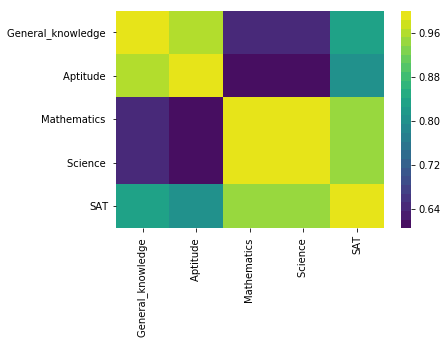

In [14]:
sns.heatmap(corr,xticklabels=file.columns,yticklabels=file.columns,cmap=sns.color_palette('viridis',25))

## Model Building

### Loading libraries for regression analysis

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Spliting the dataset into independent and dependent variables

In [16]:
feature_cols = ['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ']
X = file[feature_cols]
Y = file.SAT

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(lm.intercept_)
print(lm.coef_)

-2.0719857965689528
[ 1.16696587 -0.13478728 -0.11080959  1.09532326]


In [19]:
list(zip(feature_cols,lm.coef_))

[('General_knowledge ', 1.1669658749012364),
 ('Aptitude ', -0.13478727881667524),
 ('Mathematics ', -0.11080958792908631),
 ('Science ', 1.0953232644640183)]

In [20]:
Y_predicted = lm.predict(X)


Adding column to data frame

In [21]:
file['Y_predicted']=Y_predicted

In [22]:
file

,General_knowledge,Aptitude,Mathematics,Science,SAT,Y_predicted
0,73,71,74,73,144,145.305315
1,93,90,102,97,186,189.268764
2,89,94,97,98,182,185.711123
3,96,93,115,110,208,205.163978
4,73,68,87,83,157,155.222385
5,53,49,36,38,89,90.805768
6,69,73,71,67,131,134.128366
7,47,48,55,55,101,100.453873
8,87,89,66,66,155,152.435880
9,79,76,83,78,158,156.112504


In [23]:
print('R-Squared:',metrics.r2_score(Y,Y_predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y,Y_predicted)))

R-Squared: 0.9913965645273961
Root Mean Squared Error: 2.992131684563099


## Building model with stats

In [24]:
#using stats model
import statsmodels.api as sm

In [25]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [26]:
X = sm.add_constant(X)

C:\Users\naveen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
model2 = sm.OLS(Y,X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2622.
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.91e-93
Time:                        13:19:17   Log-Likelihood:                -241.43
No. Observations:                  96   AIC:                             492.9
Df Residuals:                      91   BIC:                             505.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0720      2

In [28]:
import lmdiag
plt.figure(figsize=(12,10))
lmdiag.plot(model2);
#first graph is for homeoscadacity
#second for normality 

NameError: name 'plt' is not defined

In [ ]:
model2.resid_